<a href="https://colab.research.google.com/github/SergiGR28/SSN/blob/main/Homework2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
#Parametres de simulació
dt = 0.01 #Pas del temps
num_steps = 1000 #Numero de pasos de la simulació
m = 1.0 #Massa
k = 1.0 #Constant de la molla
x0 = 1.0 #Posició inicial
v0 = 0.0 #Velocitat inicial

In [59]:
#Sabent que l'acceleracio per aun oscilador harmoic es
def acceleracio(x):
  return -k * x / m

In [60]:
#Formules del metode de feynman
def metode_feyman (x0,v0,dt,num_steps):
  x = np.zeros(num_steps)
  v = np.zeros(num_steps)
  E = np.zeros(num_steps)
  x[0],v[0]=x0,v0

  for i in range(1,num_steps):
    x[i] = x[i-1] + v[i-1] * dt + 0.5 * acceleracio(x[i-1]) * dt**2
    v[i] = v[i-1] + acceleracio(x[i]) * dt

    #Calcul de l'energia total
    E_cin = 0.5 * m * v[i]**2
    E_pot = 0.5 * k * x[i]**2
    E[i] = E_cin + E_pot

  return x,v,E

In [61]:
#Formules del metode de Verlet
def velocitat_verlet (x0,v0,dt,num_steps):
  x = np.zeros(num_steps)
  v = np.zeros(num_steps)
  E = np.zeros(num_steps)
  x[0],v[0]=x0,v0

  for i in range(1,num_steps):
    a = acceleracio(x[i-1])
    x[i] = x[i-1] + v[i-1] * dt + 0.5 * a * dt**2
    a_next = acceleracio(x[i])
    v[i] = v[i-1] + 0.5 * (a + a_next) * dt

    #Calcul de l'energia total
    E_cin = 0.5 * m * v[i]**2
    E_pot = 0.5 * k * x[i]**2
    E[i] = E_cin + E_pot

  return x,v,E

In [62]:
#Simulació
x_feyman, v_feyman, E_feyman = metode_feyman(x0,v0,dt,num_steps)
x_verlet,v_verlet,E_verlet = velocitat_verlet(x0,v0,dt,num_steps)

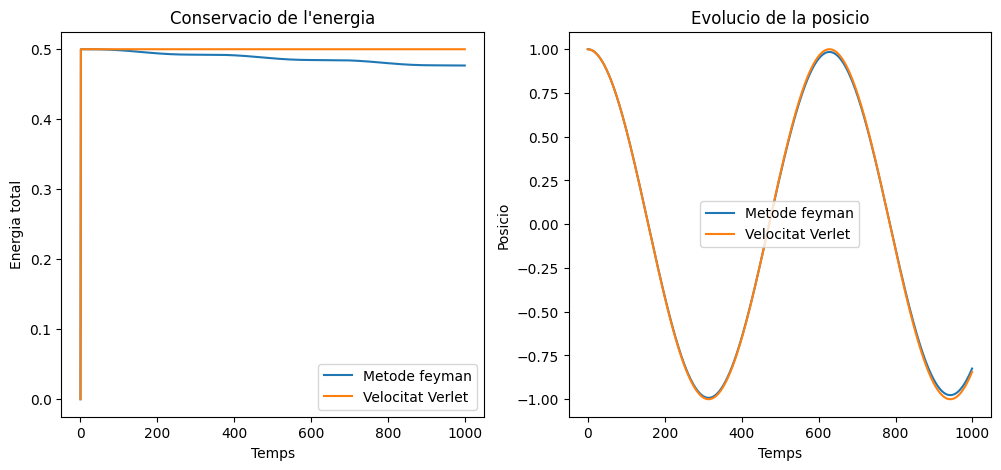

In [63]:
#Grafics
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(E_feyman,label='Metode feyman')
plt.plot(E_verlet,label='Velocitat Verlet')
plt.xlabel('Temps')
plt.ylabel('Energia total')
plt.legend()
plt.title('Conservacio de l\'energia')

plt.subplot(1,2,2)
plt.plot(x_feyman,label='Metode feyman')
plt.plot(x_verlet,label='Velocitat Verlet')
plt.xlabel('Temps')
plt.ylabel('Posicio')
plt.legend()
plt.title('Evolucio de la posicio')

plt.show()


En quant a la conservació de l'energia la Velocitat de Verlet tendeix a conservar millor l'energia en comparació al mètode de Feynman. A l'utilitzar la mitjana de l'acceleració en dos passos consecutius, redueix els errors numèrics.

En quant a la precisió el mètode de la Velocitat de Verlet proporciona una millor aproximació a la mecànica Hamiltoniana.

En quant a la implementació els dos mètodes són fàcils d'implementar. Però en simulacions de dinàmica molecular preferiblement s'usa el mètode de Verlet per la seva millor conservació de l'energia.